In [1]:
#nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1/integration/xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1_20230628-192459_6fa279_primary-1_mean_q.chi

In [55]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml

In [98]:
%matplotlib widget

In [99]:
open(filename[0],'r')

<_io.TextIOWrapper name='/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/xrd_PDF_empty_cap_background/integration/xrd_PDF_empty_cap_background_20230629-193857_a1e9d9_primary-1_mean_q.chi' mode='r' encoding='UTF-8'>

In [12]:
#read temp data
filename=glob("/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/PDF_B1_3_Ni20Cr_40nm_Kcl-LiCl_500C_1/meta/*.yaml")
filename.sort(key=os.path.getmtime,reverse=False)
meta_list=[]
for i in range(len(filename)):
    with open(filename[i],'r') as stream:
        try:
            metadata=(yaml.unsafe_load(stream))['more_info']['temp_C']
            meta_list.append(metadata)
        except yaml.YAMLError as exc:
            print(f'issue loading {str(f)}')
len(meta_list)

77

In [34]:
#read temp data
filename=glob("/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/exsitu_xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1/meta/*.yaml")
filename.sort(key=os.path.getmtime,reverse=True)
meta_list=[]
for i in range(len(filename)):
    with open(filename[i],'r') as stream:
        try:
            metadata=(yaml.unsafe_load(stream))
            meta_list.append(metadata)
        except yaml.YAMLError as exc:
            print(f'issue loading {str(f)}')
len(meta_list)

10

In [36]:
filename[1]

'/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/exsitu_xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1/meta/exsitu_xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1_20230629-174101_10f2c8.yaml'

In [39]:
meta_list[1]['more_info']['Grid_Y']['Grid_Y']['value']

40.766625000000005

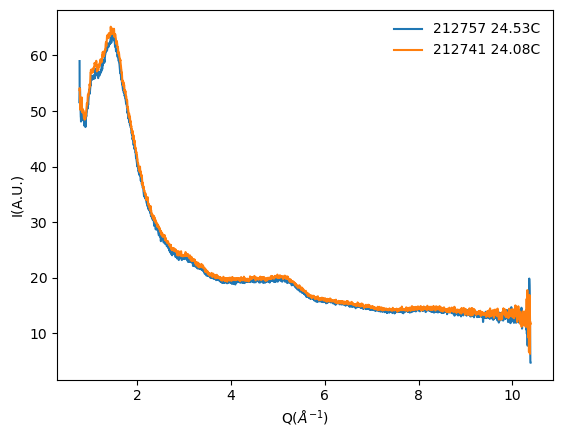

In [121]:
#read temp data
foldername="xrd_PDF_empty_cap_background"
filename_meta=glob(f"/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/{foldername}/meta/*.yaml")
filename_meta.sort(key=os.path.getmtime,reverse=False)
meta_list=[]
for i in range(len(filename_meta)):
    with open(filename_meta[i],'r') as stream:
        try:
            metadata=(yaml.unsafe_load(stream))['more_info']['temp_C']
            meta_list.append(metadata)
        except yaml.YAMLError as exc:
            print(f'issue loading {str(f)}')


filename=glob(f"/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/{foldername}/integration/*_q.chi")
filename.sort(key=os.path.getmtime,reverse=True)
data1=np.loadtxt(filename[0])
time1=filename[0].split('_20230629-')[1].split('_')[0]
temp1=meta_list[0]
data2=np.loadtxt(filename[1])
time2=filename[1].split('_20230629-')[1].split('_')[0]
temp2=meta_list[1]
plt.figure(1)
plt.plot(data1[:,0],data1[:,1],label=f'{time1} {np.round(temp1,2)}C')
plt.plot(data2[:,0],data2[:,1],label=f'{time2} {np.round(temp2,2)}C')
plt.xlabel('Q($\AA^{-1}$)')
plt.ylabel('I(A.U.)')
plt.legend(frameon=False)

In [135]:
#%matplotlib inline 
%matplotlib widget

number of scans:2.0


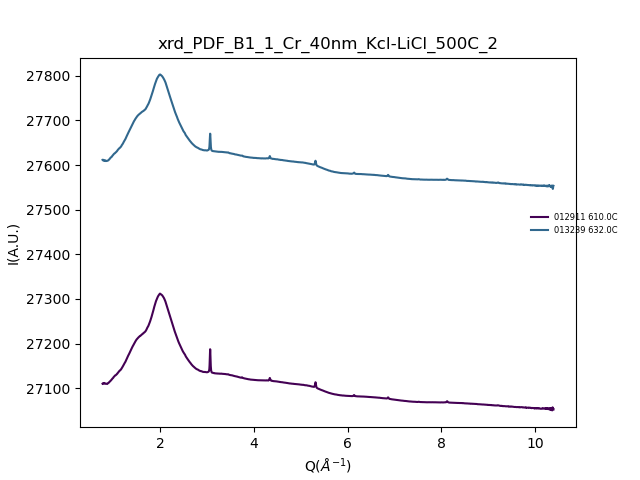

In [171]:
#updating files
#foldername="xrd_PDF_B1_4_Ni_1micron_Kcl-LiCl_500C_1"
#foldername="exsitu_xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1"
#foldername="exsitu_xrd_PDF_B1_2_Ni_40nm_Kcl-LiCl_500C_1"
#foldername="exsitu_xrd_PDF_B1_3_Ni20Cr_40nm_Kcl-LiCl_500C_1"
foldername = "xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_2"

filename=glob(f"/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/{foldername}/integration/*_q.chi")
filename_meta=glob(f"/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/{foldername}/meta/*.yaml")
filename.sort(key=os.path.getmtime,reverse=False)
filename_meta.sort(key=os.path.getmtime,reverse=False)

#configurations
last = len(filename)
first_display = last-2 #oldest
last_display = last #newest
step_scan = 1 #spacing
num_scan = np.ceil((last_display-first_display)/step_scan)
print(f"number of scans:{num_scan}")


# plot configurations
color_num=int(num_scan)+2 
colors=plt.cm.viridis
c=np.linspace(0,1,color_num) #choicing colors
shift = 500 #stack plots in y-direction


#getting temperature from metadata
meta_list=[]
for i in range(len(filename_meta)):
    with open(filename_meta[i],'r') as stream:
        try:
            metadata=(yaml.unsafe_load(stream))['more_info']['temp_C'] #for temp
            #metadata=(yaml.unsafe_load(stream))['more_info']['Grid_Y']['Grid_Y']['value'] # for ex situ
            meta_list.append(metadata)
        except yaml.YAMLError as exc:
            print(f'issue loading {str(f)}')

plt.figure()

j=0
#for i in range(last-10, last-1, 2):
for i in range(first_display, last_display, step_scan):
    # if i%10==0:
    #     break
    data1=np.loadtxt(filename[i])
    try:
        temp1=np.round(meta_list[i],0)
    except:
        temp1='NA'
    time1=filename[i].split(r'_202306')[1].split('-')[1].split('_')[0]
        # if time1==194138:
        #     print(filename[len(filename)-i-45])
    plt.plot(data1[:,0],data1[:,1]+shift*i,color=colors(c[j]),label=f'{str(time1)} {temp1}C') #for temp
    #plt.plot(data1[:,0],data1[:,1]+shift*i,color=colors(c[j]),label=f'y={temp1}')#for ex situ
    plt.xlabel('Q($\AA^{-1}$)')
    plt.ylabel('I(A.U.)')
    #bbox_to_anchor=(1, 1)
    plt.legend(frameon=False, loc='lower right',bbox_to_anchor=(1.1, 0.5),fontsize="6") #anchor tuple:(x,y):lower right position
    plt.title(foldername)
    #bbox_to_anchor=(0.8, 0.3)
    #plt.tight_layout()
    j+=1



In [ ]:
for i in range(first_display, last_display, step_scan):
    data1=np.loadtxt(filename[i])
    

In [75]:
# filename

number of scans:124.0


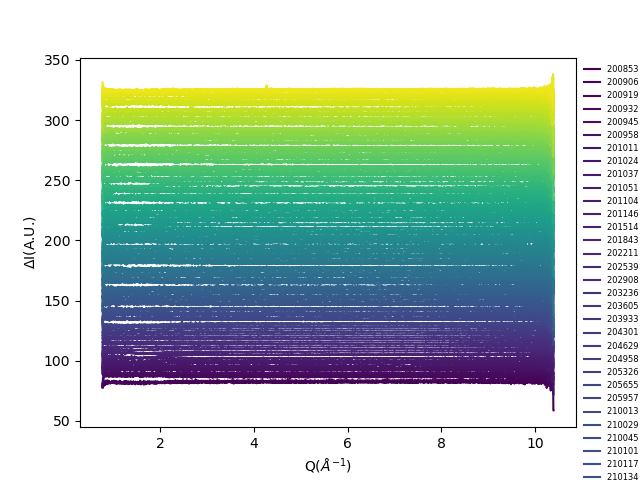

In [103]:
#the delta spectra, comparing with the first data
foldername="xrd_PDF_empty_cap_background"
filename=glob(f"/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/{foldername}/integration/*_q.chi")
filename_meta=glob(f"/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/{foldername}/meta/*.yaml")
filename.sort(key=os.path.getmtime,reverse=False)
filename_meta.sort(key=os.path.getmtime,reverse=False)


#configurations
last = len(filename)
first_display = 40 #oldest
last_display = last #newest
step_scan = 1 #spacing
num_scan = np.ceil((last_display-first_display)/step_scan)
print(f"number of scans:{num_scan}")

# plot configurations
color_num=int(num_scan)+2 
colors=plt.cm.viridis
c=np.linspace(0,1,color_num) #choicing colors
shift = 2 #stack plots in y-direction


#getting temperature from metadata
meta_list=[]

for i in range(len(filename_meta)):
    with open(filename_meta[i],'r') as stream:
        try:
            metadata=(yaml.unsafe_load(stream))['more_info']['temp_C'] #for temp
            #metadata=(yaml.unsafe_load(stream))['more_info']['Grid_Y']['Grid_Y']['value'] # for ex situ
            meta_list.append(metadata)
        except yaml.YAMLError as exc:
            print(f'issue loading {str(f)}')


plt.figure()
j=0

for i in range(first_display+1, last_display, step_scan):
    # if i%10==0:
    #     break
    data1=np.loadtxt(filename[i])
    data0=np.loadtxt(filename[i-1])
    try:
        temp1=np.round(meta_list[i],0)
    except:
        temp1='NA'
    time1=filename[i].split(r'_2023062')[1].split('-')[1].split('_')[0]
        # if time1==194138:
        #     print(filename[len(filename)-i-45])
    plt.plot(data1[:,0],data1[:,1]+1*i-data0[:,1]+1*i,color=colors(c[j]),label=f'{str(time1)} {temp1}C')
    plt.xlabel('Q($\AA^{-1}$)')
    plt.ylabel('$\Delta$I(A.U.)')
    plt.legend(frameon=False,bbox_to_anchor=(1.0, 1.0), fontsize="6")
    # plt.tight_layout()
    j+=1

  Preparing metadata (setup.py) ... done
  Created wheel for bios: filename=bios-0.1.2-py3-none-any.whl size=5258 sha256=c471fe4e9164352da0ec885ec760bdbda8038c38226a05731023caa47863f57b
  Stored in directory: /nsls2/users/ypeng1/.cache/pip/wheels/5f/60/f3/689f7e97a468388e0b6ab143ed185eadbab0607cf696bdf9f7
Successfully built bios
Note: you may need to restart the kernel to use updated packages.


In [79]:
meta_list[0]['more_info']['temp_C']

628.529

In [34]:
filename[1]

'/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/xrd_PDF_B1_3_Ni20Cr_40nm_Kcl-LiCl_500C_1/meta/xrd_PDF_B1_3_Ni20Cr_40nm_Kcl-LiCl_500C_1_20230629-111348_7b9f43.yaml'

In [107]:
data1=np.loadtxt('/nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1/integration/xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1_20230628-194138_6ad1ad_primary-1_mean_q.chi')
plt.figure()
plt.plot(data1[:,0],data1[:,1],label=str(time1))
plt.xlabel('Q($\AA^{-1}$)')
plt.ylabel('I(A.U.)')
plt.legend(frameon=False)

FileNotFoundError: /nsls2/data2/pdfhack/legacy/processed/xpdacq_data/user_data/tiff_base/xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1/integration/xrd_PDF_B1_1_Cr_40nm_Kcl-LiCl_500C_1_20230628-194138_6ad1ad_primary-1_mean_q.chi not found.